# Case Study #07- Supervised Learning

Submitted By : SHUHAIB T P

In [1]:
#import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment.

In [2]:
data = pd.read_excel('iris.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Do necessary pre-processing steps

In [4]:
#Let's find number of missing values in each columns
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.fillna((data.mean()), inplace=True)
data.isna().sum()

C:\Users\91999\AppData\Local\Temp/ipykernel_2884/1022529673.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna((data.mean()), inplace=True)


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

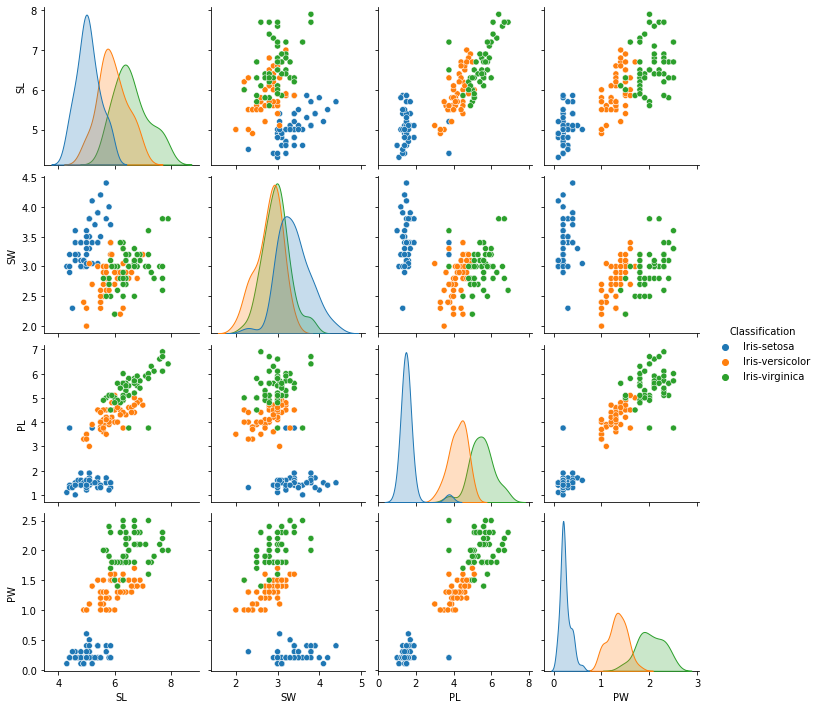

In [6]:
# plotting a pair plot
sns.pairplot(data, hue='Classification', markers='o')
plt.show()

### Checking Outliers

Text(0.5, 1.0, 'SL')

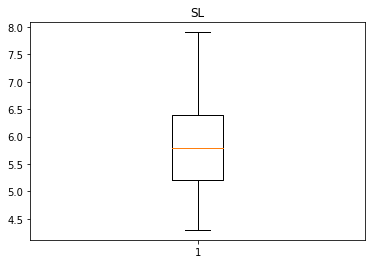

In [7]:
plt.boxplot(data["SL"])
plt.title('SL')

No Outlier in SL

Text(0.5, 1.0, 'SW')

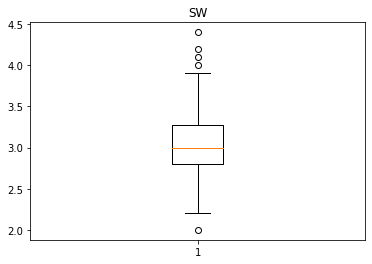

In [8]:
plt.boxplot(data["SW"])
plt.title('SW')

Outliers present in SW let's remove it

In [9]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')
print ("Q1 :", Q1)
print ("Q2 :", Q2)
print ("Q3 :", Q3)
IQR = Q3 -Q1
Low_lim = Q1 - 1.5*IQR
Up_lim = Q3 + 1.5*IQR
print("Inter Quartile Range : ",IQR)
print("Lower Limit : ",Low_lim)
print("Upper Limit : ",Up_lim)

Q1 : 2.8
Q2 : 3.0
Q3 : 3.25
Inter Quartile Range :  0.4500000000000002
Lower Limit :  2.1249999999999996
Upper Limit :  3.9250000000000003


In [10]:
outlier = []
for x in data["SW"]:
  if ((x > Up_lim) or (x < Low_lim)):
    outlier.append(x)

print("outliers:" , outlier)

outliers: [4.0, 4.4, 4.1, 4.2, 2.0]


In [11]:
index = data['SW']>=Up_lim
index = data.loc[index].index
data.drop(index, inplace = True)

In [12]:
index1 = data['SW']<=Low_lim
index1=data.loc[index1].index
data.drop(index1, inplace = True)

Text(0.5, 1.0, 'SW')

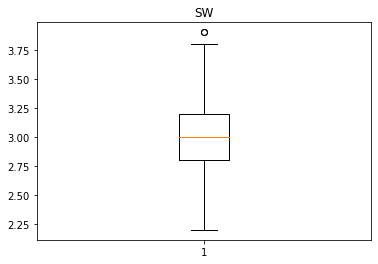

In [13]:
# check again SW
plt.boxplot(data["SW"])
plt.title('SW')

In [14]:
# outliers removed in SW

Text(0.5, 1.0, 'PL')

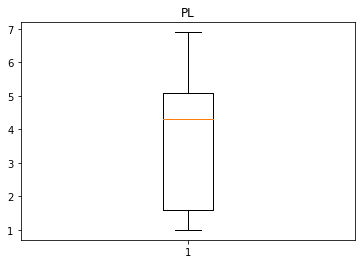

In [15]:
plt.boxplot(data["PL"])
plt.title('PL')

No outliers in PL

Text(0.5, 1.0, 'PW')

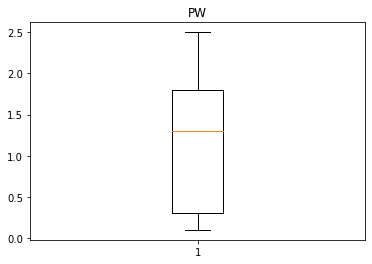

In [16]:
plt.boxplot(data["PW"])
plt.title('PW')

No Outliers present in PW

In [17]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [18]:
# classification field is object type let's check the values in it
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [19]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
lbl_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=lbl_en.fit_transform(data[a[i]])

In [20]:
data['Classification'].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

Iris-virginica    is labelled as 2,
Iris-versicolor   is labelled as 1,
Iris-setosa       is labelled as 0

In [21]:
data.shape

(145, 5)

In [22]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [23]:
x=data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

## 3. Find out which classification model gives the best result to predict iris species(also do random forest algorithm)

In [26]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#test size=0.3 means 30% of data is used for test
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

# Logistic regression
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(x_train,y_train)
y_pred = logic_model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

x_train shape :  (101, 4)
y_train shape :  (101, 1)
x_test shape :  (44, 4)
y_test shape :  (44, 1)
accuracy_score 0.8863636363636364
precision_score 0.9030032467532468
f1_score 0.8901161718605938
comfusion matrix:  [[14  1  0]
 [ 0 10  1]
 [ 0  3 15]]


C:\Users\91999\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9090909090909091
precision_score 0.9333333333333332
f1_score 0.9104020979020979
comfusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]


In [30]:
#Support Vector Machine
from sklearn import svm
svmc= svm.SVC()
svmc.fit(x_train,y_train) 
y_pred = svmc.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.8636363636363636
precision_score 0.8893939393939394
f1_score 0.8685687353398953
comfusion matrix:  [[14  1  0]
 [ 0 10  1]
 [ 0  4 14]]


C:\Users\91999\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(x_train,y_train)
y_pred = knnc.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9318181818181818
precision_score 0.9356060606060607
f1_score 0.9329085457271364
comfusion matrix:  [[14  1  0]
 [ 0 10  1]
 [ 0  1 17]]


C:\Users\91999\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9318181818181818
precision_score 0.9356060606060607
f1_score 0.9329085457271364
comfusion matrix:  [[14  1  0]
 [ 0 10  1]
 [ 0  1 17]]


C:\Users\91999\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN has maximum accuracy

### Random Forest Algorithm

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9318181818181818
precision_score 0.9464285714285713
f1_score 0.932809917355372
comfusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  3 15]]


C:\Users\91999\AppData\Local\Temp/ipykernel_2884/3249085679.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [36]:
# Feature Importance
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    51.158352
PL    37.198447
SL    10.167002
SW     1.476200
dtype: float64

### Logistic regression:-

accuracy_score 0.8863636363636364, 
precision_score 0.9030032467532468, 
f1_score 0.8901161718605938

### decision Tree classifier
  
accuracy_score 0.9090909090909091, 
precision_score 0.9333333333333332, 
f1_score 0.9104020979020979

### Support Vector Machine

accuracy_score 0.8636363636363636, 
precision_score 0.8893939393939394, 
f1_score 0.8685687353398953

### KNN

accuracy_score 0.9318181818181818, 
precision_score 0.9356060606060607, 
f1_score 0.9329085457271364

### Gradient Boosting

accuracy_score 0.9318181818181818, 
precision_score 0.9464285714285713, 
f1_score 0.932809917355372

### Random Forest Algorithm

accuracy_score 0.9318181818181818, 
precision_score 0.9464285714285713, 
f1_score 0.932809917355372


### from all this Random forest and Gradient boosting algothm giving better results